# White Blood Cell Classification Using Convolutional Neural Network



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import layers
import tensorflow as tf
from keras.layers import Dense
from keras import Model
from sklearn.metrics import accuracy_score, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v2 import preprocess_input
from keras.applications import MobileNetV2


In [8]:
train_dir = 'C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TRAIN'
test_sample_dir = 'C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST_SIMPLE'

# Loading Image Data

In [9]:

train_gen = ImageDataGenerator(preprocessing_function = preprocess_input, validation_split=0.2)

test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [10]:
# Flow image data

train_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)

test_sample_images = test_gen.flow_from_directory(
    directory=test_sample_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


# Build Pretrained Model

In [11]:
#  whether to include the fully-connected layer at the top of the network. 
pretrained_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')
# means that global average pooling will be applied to the output of the last convolutional block

pretrained_model.trainable = False

# Build Classification Model

In [12]:
inputs = pretrained_model.input

x = layers.Dense(128, activation='relu')(pretrained_model.output) # first fully connected layer 

outputs = layers.Dense(4, activation='softmax')(x)  # output layer 

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Training

In [9]:
history = model.fit(train_images,validation_data=val_images,epochs=100,callbacks=[ tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
249/249 [==============================] - 376s 1s/step - loss: 0.8219 - accuracy: 0.6683 - val_loss: 0.5443 - val_accuracy: 0.7989
Epoch 2/100
249/249 [==============================] - 249s 1s/step - loss: 0.4640 - accuracy: 0.8254 - val_loss: 0.4443 - val_accuracy: 0.8270
Epoch 3/100
249/249 [==============================] - 252s 1s/step - loss: 0.3454 - accuracy: 0.8732 - val_loss: 0.3588 - val_accuracy: 0.8658
Epoch 4/100
249/249 [==============================] - 248s 996ms/step - loss: 0.2732 - accuracy: 0.8968 - val_loss: 0.3156 - val_accuracy: 0.8748
Epoch 5/100
249/249 [==============================] - 240s 966ms/step - loss: 0.2106 - accuracy: 0.9251 - val_loss: 0.2759 - val_accuracy: 0.8964
Epoch 6/100
249/249 [==============================] - 219s 878ms/step - loss: 0.1762 - accuracy: 0.9385 - val_loss: 0.2723 - val_accuracy: 0.8959
Epoch 7/100
249/249 [==============================] - 218s 876ms/step - loss: 0.1650 - accuracy: 0.9421 - val_loss: 0.2541 - v

In [1]:
7968/32

249.0

In [20]:
model.save("wbcmobilenetv5model.h5")

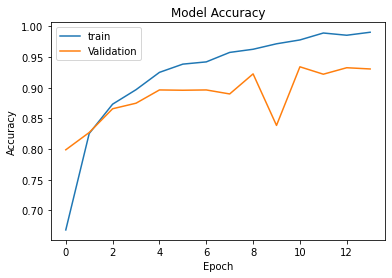

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

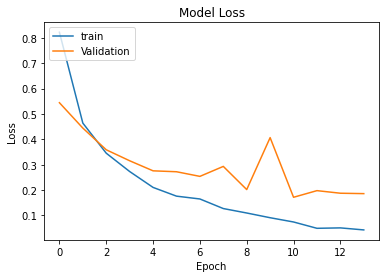

In [12]:
#train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

In [32]:
#from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
models = load_model('wbcmobilenetv5model.h5')
# summarize model.
models.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Results

In [34]:
CLASS_NAMES = list(train_images.class_indices.keys())
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

Found 7968 images belonging to 4 classes.
249/249 [==============================] - 171s 684ms/step
Test Accuracy: 99.460%


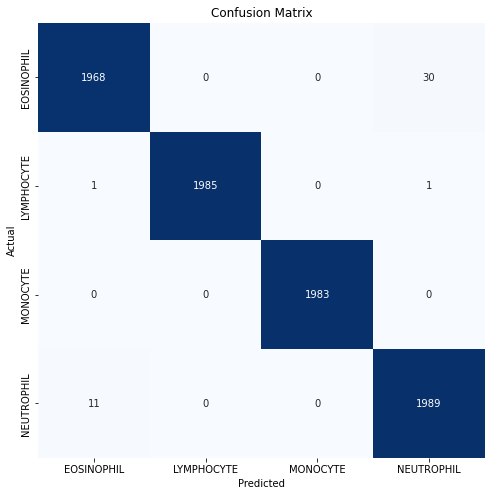

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.99      0.98      0.99      1998
  LYMPHOCYTE       1.00      1.00      1.00      1987
    MONOCYTE       1.00      1.00      1.00      1983
  NEUTROPHIL       0.98      0.99      0.99      2000

    accuracy                           0.99      7968
   macro avg       0.99      0.99      0.99      7968
weighted avg       0.99      0.99      0.99      7968



In [18]:
predictions = np.argmax(model.predict(train_images), axis=1)

acc = accuracy_score(train_images.labels, predictions)
cm = tf.math.confusion_matrix(train_images.labels, predictions)
clr = classification_report(train_images.labels, predictions, target_names=CLASS_NAMES)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual") 
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Found 1989 images belonging to 4 classes.
63/63 [==============================] - 41s 653ms/step
Validation Accuracy: 93.414%


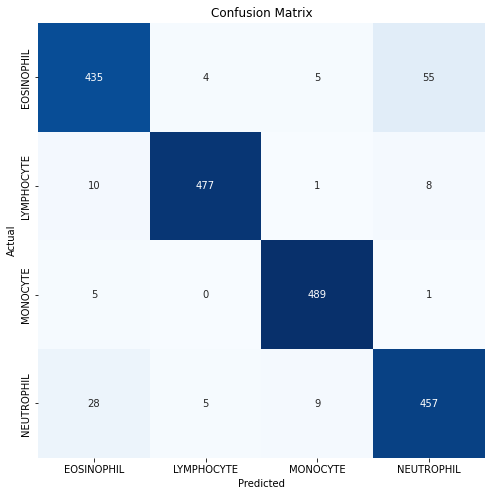

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.91      0.87      0.89       499
  LYMPHOCYTE       0.98      0.96      0.97       496
    MONOCYTE       0.97      0.99      0.98       495
  NEUTROPHIL       0.88      0.92      0.90       499

    accuracy                           0.93      1989
   macro avg       0.93      0.93      0.93      1989
weighted avg       0.93      0.93      0.93      1989



In [16]:
predictions = np.argmax(model.predict(val_images), axis=1)

acc = accuracy_score(val_images.labels, predictions)
cm = tf.math.confusion_matrix(val_images.labels, predictions)
clr = classification_report(val_images.labels, predictions, target_names=CLASS_NAMES)

print("Validation Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Found 71 images belonging to 4 classes.
3/3 [==============================] - 4s 1s/step
test sample Accuracy: 71.831%


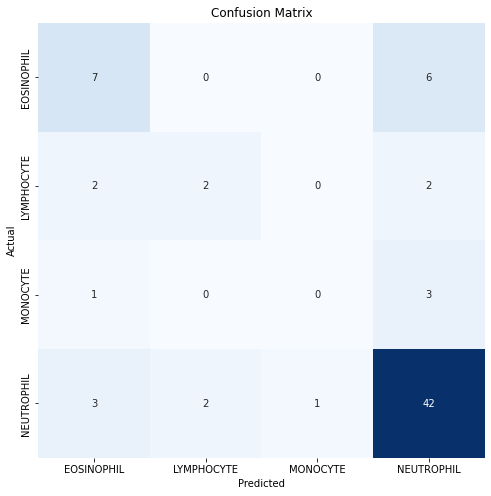

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.54      0.54      0.54        13
  LYMPHOCYTE       0.50      0.33      0.40         6
    MONOCYTE       0.00      0.00      0.00         4
  NEUTROPHIL       0.79      0.88      0.83        48

    accuracy                           0.72        71
   macro avg       0.46      0.44      0.44        71
weighted avg       0.68      0.72      0.69        71



In [36]:
test_sample_images = test_gen.flow_from_directory(
    directory=test_sample_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle= False,
    seed=42
)

predictions = np.argmax(model.predict(test_sample_images), axis=1)


acc = accuracy_score(test_sample_images.labels, predictions)
cm = tf.math.confusion_matrix(test_sample_images.labels, predictions)
clr = classification_report(test_sample_images.labels, predictions, target_names=CLASS_NAMES)

print("test sample Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks= np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

# Prediction

In [84]:
import numpy as np
#from keras.preprocessing import image
import keras.utils as image

file = "C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_0_278.jpeg"



img = image.load_img(file, target_size=(224, 224))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

In [85]:
img.shape

(1, 224, 224, 3)

In [86]:
prediction_prob = np.argmax(models.predict(img)) # Returns the indices of the maximum values along an axis.

print(prediction_prob)

if prediction_prob == 0 :
    print('EOSINOPHIL')
elif prediction_prob == 1 :
    print('LYMPHOCYTE')
elif prediction_prob == 2 :
    print('MONOCYTE') 
elif prediction_prob == 3 :
    print('NEUTROPHIL')

1/1 [==============================] - 0s 51ms/step
1
LYMPHOCYTE


In [91]:
file = "C:/Users/pramod/Desktop/CV/INTERNSHIP/dataset2-master/dataset2-master/images/TEST_SIMPLE/NEUTROPHIL/_3_1003.jpeg"

img = image.load_img(file, target_size=(224, 224))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

In [92]:
prediction_prob = np.argmax(models.predict(img)) # Returns the indices of the maximum values along an axis.

print(prediction_prob)

if prediction_prob == 0 :
    print('EOSINOPHIL')
elif prediction_prob == 1 :
    print('LYMPHOCYTE')
elif prediction_prob == 2 :
    print('MONOCYTE') 
elif prediction_prob == 3 :
    print('NEUTROPHIL')

1/1 [==============================] - 0s 52ms/step
3
NEUTROPHIL


reference : (https://www.kaggle.com/code/stpeteishii/blood-cell-mobilenetv2-model)